In [1]:
from ga4stpg.util import STEIN_B
from ga4stpg.graph import ReaderORLibrary, UGraph
from ga4stpg.graph.util import is_steiner_tree
from ga4stpg.tree.evaluation import EvaluateTreeGraph
from ga4stpg.tree.generate import GenerateBasedRandomWalk, GenerateBasedPrimRST

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt 

from collections import Counter
from statistics import mean, stdev
from os import path

In [3]:
from scipy import stats

In [4]:
import config

In [5]:
INDEX = 15
filename = STEIN_B[INDEX][0]

print(filename)

filename = path.join(config.dataset_directory, filename)
stpg = ReaderORLibrary().parser(filename)

steinb16.txt


In [6]:
print("STPG information", '\n', 10*'- ')
print('Instance: ', stpg.name)
print('Best Known cost: ', STEIN_B[INDEX][1])
print("Nro. Node:", stpg.nro_nodes)
print("Nro. Edges:", stpg.nro_edges)
print("Nro. Terminals:", stpg.nro_terminals)
print("Terminals: \n", stpg.terminals)

STPG information 
 - - - - - - - - - - 
Instance:  B16
Best Known cost:  127
Nro. Node: 100
Nro. Edges: 200
Nro. Terminals: 17
Terminals: 
 {97, 37, 69, 72, 9, 76, 60, 81, 82, 17, 20, 21, 54, 87, 25, 59, 28}


In [7]:
nro_individuals = 1_000

In [8]:
gen_randomWalk = GenerateBasedRandomWalk(stpg)
evaluator = EvaluateTreeGraph(stpg)

In [9]:
%%time
costs_randomWalk = [evaluator(gen_randomWalk())[0] 
                       for _ in range(nro_individuals)]

Wall time: 4.66 s


In [10]:
result_randomWalk = stats.shapiro(costs_randomWalk)

print(result_randomWalk.pvalue)

print(result_randomWalk.pvalue < 0.05)

5.554669679948276e-13
True


(array([  1.,   0.,   0.,   1.,   1.,   2.,  12.,  27.,  63., 153., 232.,
        255., 172.,  66.,  15.]),
 array([366.        , 382.13333333, 398.26666667, 414.4       ,
        430.53333333, 446.66666667, 462.8       , 478.93333333,
        495.06666667, 511.2       , 527.33333333, 543.46666667,
        559.6       , 575.73333333, 591.86666667, 608.        ]),
 <BarContainer object of 15 artists>)

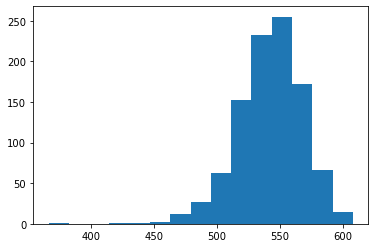

In [11]:
cost_mean = mean(costs_randomWalk)
cost_stdev = stdev(costs_randomWalk)

_ = plt.hist(costs_randomWalk, bins=15)
# plt.vlines(cost_mean, 0, 3000, colors='red')

In [12]:
print(cost_mean)
print(cost_stdev)

542.178
26.158834083357014


In [13]:
gen_primRST = GenerateBasedPrimRST(stpg)

In [14]:
%%time
cost_primBased = [evaluator(gen_primRST())[0] 
                      for _ in range(nro_individuals)]

Wall time: 1.55 s


(array([  1.,   0.,   0.,   0.,   2.,  11.,  18.,  46., 130., 209., 279.,
        191.,  83.,  28.,   2.]),
 array([384.        , 399.86666667, 415.73333333, 431.6       ,
        447.46666667, 463.33333333, 479.2       , 495.06666667,
        510.93333333, 526.8       , 542.66666667, 558.53333333,
        574.4       , 590.26666667, 606.13333333, 622.        ]),
 <BarContainer object of 15 artists>)

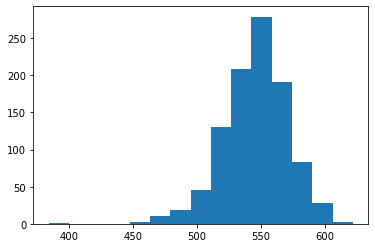

In [15]:
cost_mean = mean(cost_primBased)
cost_stdev = stdev(cost_primBased)

_ = plt.hist(cost_primBased, bins=15)
# plt.vlines(cost_mean, 0, 3000, colors='red')

In [16]:
print(cost_mean)
print(cost_stdev)

545.775
25.50421219798486


In [24]:
shapiro_test = stats.shapiro(cost_primBased)

print(shapiro_test.pvalue)

print(shapiro_test.pvalue < 0.05)

2.388412134735063e-09
True


In [18]:
result_ttest = stats.ttest_ind(costs_randomWalk, cost_primBased)

In [19]:
print(result_ttest)
print()
print(result_ttest.pvalue < 0.005)

Ttest_indResult(statistic=-3.1134404542473773, pvalue=0.0018754063729885253)

True


In [20]:
result_ttest2 = stats.ttest_ind(costs_randomWalk, 
                               cost_primBased, 
                               equal_var=False)

In [21]:
result_ttest2.pvalue

0.001875423265072838

In [23]:
print(result_ttest2.pvalue < 0.05)

True
